Step 1: Data Cleaning


In [1]:
import pandas as pd

# Load the data
data = pd.read_csv('reported.csv')  # Correct path for your Jupyter environment

# Calculate the median for each column and fill missing values
for column in data.columns:
    if data[column].isnull().any():
        data[column] = data[column].fillna(data[column].median())

# Save the cleaned data
data.to_csv('cleaned_reported.csv', index=False)  # Saving the cleaned file in the same directory



C:\Users\jeffo\AppData\Local\Temp\ipykernel_28160\1821886250.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


2. Data Visualization

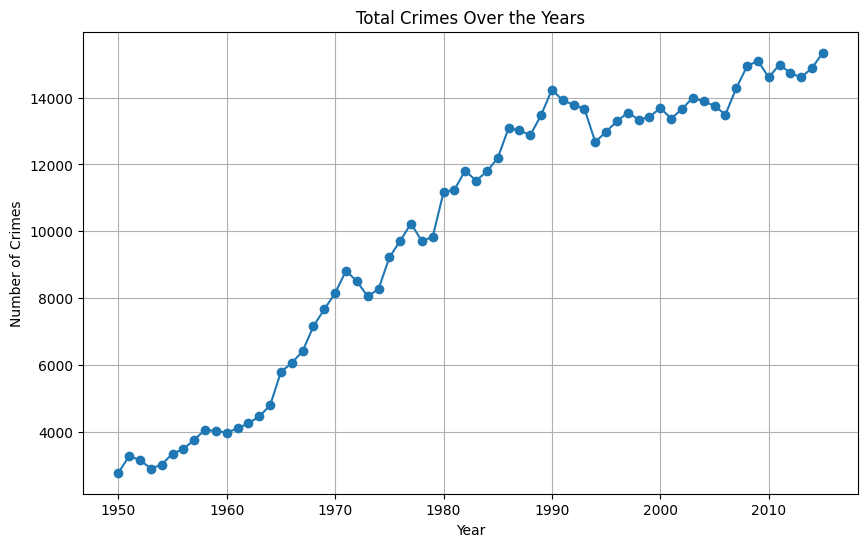

In [2]:
import matplotlib.pyplot as plt

# Plot total crimes over the years
plt.figure(figsize=(10, 6))
plt.plot(data['Year'], data['crimes.total'], marker='o')
# This sets up a plot with a specified size.
# It plots 'crimes.total' against 'Year'.
# 'marker='o'' means that each data point is marked with a circle.

plt.title('Total Crimes Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
# These lines add a title and labels for the x-axis and y-axis.

plt.grid(True)
plt.show()
# 'plt.grid(True)' adds a grid to the plot for better readability.
# 'plt.show()' displays the plot.


3. Prepare Data for Model

In [3]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler()
# This initializes a MinMaxScaler object, which scales each feature to a given range, here 0 to 1.

data_scaled = scaler.fit_transform(data.select_dtypes(include=[np.number]))
# This line selects numerical data from the DataFrame and scales it.
# 'fit_transform()' first fits the scaler to the data then transforms it.

# Convert scaled data back to DataFrame
data_scaled = pd.DataFrame(data_scaled, columns=data.select_dtypes(include=[np.number]).columns)
# This converts the scaled array back to a DataFrame,
# preserving the original column names.


4. Develop the Interactive Application

In [4]:
def get_crime_stats(year):
    year_data = data[data['Year'] == year]
    # This function fetches crime data for a given year.
    # It filters the DataFrame for the row where 'Year' equals the specified year.

    if not year_data.empty:
        print(f"Total crimes in {year}: {year_data['crimes.total'].iloc[0]}")
        # If the data for the year exists, it prints the total crimes for that year.
    else:
        print("Data not available for this year.")
        # If there is no data for the year, it informs the user.

# User interaction
year_query = int(input("Enter a year to get crime statistics: "))
get_crime_stats(year_query)
# This part allows the user to enter a year, then it calls the function to show the crime stats for that year.


Enter a year to get crime statistics:  1964


Total crimes in 1964: 4799


5. Business and Social Implications

In [5]:
report = """
This application helps law enforcement agencies and policymakers to understand crime trends and allocate resources more effectively. By analyzing historical crime data, the application can predict future crime rates and suggest areas that need more attention.
"""

print(report)
# This is a simple text output that describes the potential uses and benefits of the application.
# It's meant to provide context on how the tool can be applied in real-world scenarios.



This application helps law enforcement agencies and policymakers to understand crime trends and allocate resources more effectively. By analyzing historical crime data, the application can predict future crime rates and suggest areas that need more attention.

